#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import random
random.seed(1000)
import string 
from string import *
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import tqdm

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer

WordNetLemmatizer class finds a valid word.In simple words, stemming technique only looks at the 
form of the word whereas lemmatization technique looks at the meaning of the word. It means after
applying lemmatization, we will always get a valid word.

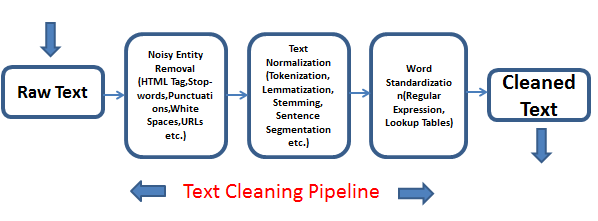

In [3]:
# nltk.download('stopwords')  ## corpus.stopwords
# nltk.download('averaged_perceptron_tagger') ##pos_tag
# nltk.download('words')
# !pip install -U spacy

In [4]:
%config IPCompleter.greedy=True
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

#### Load Dataset

In [5]:
f=open("C:/Users/NANDAKUMAR/Desktop/SUMITHRA/DATASCIENCE/Data set/amazon_cells_labelled.txt")

In [6]:
list_lines=f.readlines()
#print(list_lines)

In [7]:
arr=np.array(list_lines)
arr[0:5]

array(['So there is no way for me to plug it in here in the US unless I go by a converter.\t0\n',
       'Good case, Excellent value.\t1\n', 'Great for the jawbone.\t1\n',
       'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!\t0\n',
       'The mic is great.\t1\n'], dtype='<U152')

In [8]:
data=[]
for i in range(len(arr)):
    arr_split=arr[i].strip().split('\t')
    data.append(arr_split)
data[0:5]    

[['So there is no way for me to plug it in here in the US unless I go by a converter.',
  '0'],
 ['Good case, Excellent value.', '1'],
 ['Great for the jawbone.', '1'],
 ['Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
  '0'],
 ['The mic is great.', '1']]

In [9]:
df=pd.DataFrame(data,columns=['Reviews','Sentiment'])
df.head(2)

,Reviews,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1


In [10]:
df.shape

(1000, 2)

#### Build Train and Test Dataset

In [11]:
Reviews=df['Reviews'].values
Sentiment=df['Sentiment'].values
test_reviews=Reviews[800:]
train_reviews=Reviews[:800]
train_sentiment=Sentiment[:800]
test_sentiment=Sentiment[800:]

#### Text Wrangling

In [12]:
def cleaned_data(data):
    cleaned_text=[]
    for sent in tqdm.tqdm(data):
        sent=sent.lower()
        sent=BeautifulSoup(sent).get_text()
        reg=re.compile(r'https?:\/\/.\S+')
        sent=re.sub(reg," ",sent)
        sent=re.sub(r'[^a-zA-Z]'," ",sent)
        sent=sent.strip()
        tokens=word_tokenize(sent)
        stop_words=set(stopwords.words('english'))
        words=[word for word in tokens if word not in stop_words]
        lemmatizer=WordNetLemmatizer()
        str1=""
        for i in range(len(words)):
            lem=lemmatizer.lemmatize(words[i])
            str1+=lem+" "
        str1.strip()
        cleaned_text.append(str1.strip())
    return cleaned_text     
       

In [13]:
clean_train_reviews=cleaned_data(train_reviews) 

100%|███████████████████████████████████████████████████████████████████████████████| 800/800 [00:03<00:00, 260.78it/s]


In [14]:
clean_test_reviews=cleaned_data(test_reviews)

100%|██████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1072.37it/s]


#### Traditional Supervised Machine Learning Models

#### Feature Engineering

##### Build BOW feature on train reviews

In [15]:
# Bag of Words - Pipeline

In [16]:
# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
# from sklearn.naive_bayes import MultinomialNB
# clf = Pipeline([
#     ('vect', CountVectorizer()),
#     ('tfidf', TfidfTransformer()),
#     ('classifier', RandomForestClassifier()),
#     ])
# clf_fit=clf.fit(clean_train_reviews,train_sentiment)
# clf_pred=clf.predict(clean_test_reviews)
# labels=['Negative','Positive']
# print(classification_report(test_sentiment,clf_pred,target_names=labels))
# pd.DataFrame(confusion_matrix(test_sentiment,clf_pred),index=labels,columns=labels)

In [17]:
cv=CountVectorizer(strip_accents='unicode',ngram_range=(2,2))
cv.fit(clean_train_reviews)
cv_train_reviews=cv.transform(clean_train_reviews)
cv_extracted_features=cv.get_feature_names()
print('No of cv train extracted feature:',len(cv_extracted_features))
print('Shape of cv train features:',cv_train_reviews.shape)
cv_train_reviews.toarray()


CountVectorizer(ngram_range=(2, 2), strip_accents='unicode')

No of cv train extracted feature: 3091
Shape of cv train features: (800, 3091)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

##### Build TFIDF feature on train reviews

In [18]:
tv=TfidfVectorizer(ngram_range=(2,2))
tv.fit(clean_train_reviews)
tv_train_reviews=tv.transform(clean_train_reviews)
tv_extracted_features=tv.get_feature_names()
print('Nos of tv train extracted features:',len(tv_extracted_features))
print('Shape of tv train features:',tv_train_reviews.shape)
tv_train_reviews.toarray()

TfidfVectorizer(ngram_range=(2, 2))

Nos of tv train extracted features: 3091
Shape of tv train features: (800, 3091)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
cv_test_reviews=cv.transform(clean_test_reviews)
tv_test_reviews=tv.transform(clean_test_reviews)
print('Shape of cv test features:',cv_test_reviews.shape)
print('Shape of tv test features:',tv_test_reviews.shape)

Shape of cv test features: (200, 3091)
Shape of tv test features: (200, 3091)


#### Model Training ,Prediction and Performance Evaluation

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


##### LogisticRegression Model on BOW features

In [21]:
lr=LogisticRegression(solver='lbfgs',max_iter=500,random_state=1000)
lr_bow=lr.fit(cv_train_reviews,train_sentiment)
lr_bow_predict=lr.predict(cv_test_reviews)

In [22]:
labels=['Negative','Positive']
print(classification_report(test_sentiment,lr_bow_predict,target_names=labels))
pd.DataFrame(confusion_matrix(test_sentiment,lr_bow_predict),index=labels,columns=labels)

              precision    recall  f1-score   support

    Negative       0.65      0.95      0.78       109
    Positive       0.88      0.40      0.55        91

    accuracy                           0.70       200
   macro avg       0.77      0.67      0.66       200
weighted avg       0.76      0.70      0.67       200



,Negative,Positive
Negative,104,5
Positive,55,36


##### RandomForest Model on BOW features

In [23]:
rf=RandomForestClassifier(random_state=1000,max_depth=7)
rf_cv=rf.fit(cv_train_reviews,train_sentiment)
rf_cv_predict=rf.predict(cv_test_reviews)
labels=['Negative','Positive']
print(classification_report(test_sentiment,rf_cv_predict,target_names=labels))
pd.DataFrame(confusion_matrix(test_sentiment,rf_cv_predict),index=labels,columns=labels)

              precision    recall  f1-score   support

    Negative       1.00      0.06      0.12       109
    Positive       0.47      1.00      0.64        91

    accuracy                           0.49       200
   macro avg       0.74      0.53      0.38       200
weighted avg       0.76      0.49      0.36       200



,Negative,Positive
Negative,7,102
Positive,0,91


##### SVC Model on BOW Features

In [24]:
sv=LinearSVC()
sv_cv=sv.fit(cv_train_reviews,train_sentiment)
sv_cv_predict=sv.predict(cv_test_reviews)
labels=['Negative','Positive']
print(classification_report(test_sentiment,sv_cv_predict,target_names=labels))
pd.DataFrame(confusion_matrix(test_sentiment,sv_cv_predict),index=labels,columns=labels)

              precision    recall  f1-score   support

    Negative       0.66      0.95      0.78       109
    Positive       0.88      0.41      0.56        91

    accuracy                           0.70       200
   macro avg       0.77      0.68      0.67       200
weighted avg       0.76      0.70      0.68       200



,Negative,Positive
Negative,104,5
Positive,54,37


##### KNN Model on BOW Features

In [25]:
knn=KNeighborsClassifier(n_neighbors=5,weights='distance',p=2,algorithm='brute' )
knn_cv=knn.fit(cv_train_reviews,train_sentiment)
knn_cv_predict=knn_cv.predict(cv_test_reviews)
labels=['Negative','Positive']
print(classification_report(test_sentiment,knn_cv_predict,target_names=labels))
pd.DataFrame(confusion_matrix(test_sentiment,knn_cv_predict),index=labels,columns=labels)

              precision    recall  f1-score   support

    Negative       0.59      0.94      0.72       109
    Positive       0.75      0.20      0.31        91

    accuracy                           0.60       200
   macro avg       0.67      0.57      0.52       200
weighted avg       0.66      0.60      0.54       200



,Negative,Positive
Negative,103,6
Positive,73,18


##### LogisticRegression on TFIDF features

In [26]:
lr=LogisticRegression(solver='lbfgs',max_iter=700,random_state=1000)
lr_tv=lr.fit(tv_train_reviews,train_sentiment)
lr_tv_predict=lr.predict(tv_test_reviews)

In [27]:
labels=['Negative','Positive']
print(classification_report(test_sentiment,lr_tv_predict,target_names=labels))
pd.DataFrame(confusion_matrix(test_sentiment,lr_tv_predict),index=labels,columns=labels)

              precision    recall  f1-score   support

    Negative       0.66      0.95      0.78       109
    Positive       0.88      0.41      0.56        91

    accuracy                           0.70       200
   macro avg       0.77      0.68      0.67       200
weighted avg       0.76      0.70      0.68       200



,Negative,Positive
Negative,104,5
Positive,54,37


##### RandomForest Model on TFIDF feature

In [28]:
rf=RandomForestClassifier(random_state=1000,max_depth=7)
rf_tv=rf.fit(tv_train_reviews,train_sentiment)
rf_tv_predict=rf.predict(tv_test_reviews)
labels=['Negative','Positive']
print(classification_report(test_sentiment,rf_tv_predict,target_names=labels))
pd.DataFrame(confusion_matrix(test_sentiment,rf_tv_predict),index=labels,columns=labels)

              precision    recall  f1-score   support

    Negative       1.00      0.06      0.12       109
    Positive       0.47      1.00      0.64        91

    accuracy                           0.49       200
   macro avg       0.74      0.53      0.38       200
weighted avg       0.76      0.49      0.36       200



,Negative,Positive
Negative,7,102
Positive,0,91


##### SVC Model on TFIDF feature

In [29]:
sv=LinearSVC()
sv_tv=sv.fit(tv_train_reviews,train_sentiment)
sv_tv_predict=sv.predict(tv_test_reviews)
labels=['Negative','Positive']
print(classification_report(test_sentiment,sv_tv_predict,target_names=labels))
pd.DataFrame(confusion_matrix(test_sentiment,sv_tv_predict),index=labels,columns=labels)

              precision    recall  f1-score   support

    Negative       0.66      0.95      0.78       109
    Positive       0.88      0.41      0.56        91

    accuracy                           0.70       200
   macro avg       0.77      0.68      0.67       200
weighted avg       0.76      0.70      0.68       200



,Negative,Positive
Negative,104,5
Positive,54,37


##### KNN Model on TFIDF Features

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipe=Pipeline([('Transform',TfidfTransformer(norm='l2') ), ('knn', KNeighborsClassifier(n_neighbors=5,weights='distance',p=2))])
# knn=KNeighborsClassifier(n_neighbors=3,weights='uniform',p=2)
knn_tv= pipe.fit(tv_train_reviews,train_sentiment)
knn_tv_predict=knn_tv.predict(tv_test_reviews)
labels=['Negative','Positive']
print(classification_report(test_sentiment,knn_tv_predict,target_names=labels))
pd.DataFrame(confusion_matrix(test_sentiment,knn_tv_predict),index=labels,columns=labels)

              precision    recall  f1-score   support

    Negative       0.60      0.92      0.72       109
    Positive       0.72      0.25      0.37        91

    accuracy                           0.61       200
   macro avg       0.66      0.59      0.55       200
weighted avg       0.65      0.61      0.56       200



,Negative,Positive
Negative,100,9
Positive,68,23


In [35]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(cv_train_reviews.toarray(),train_sentiment)
nb_pred=nb.predict(cv_test_reviews.toarray())
labels=['Negative','Positive']
print(classification_report(test_sentiment,nb_pred,target_names=labels))
pd.DataFrame(confusion_matrix(test_sentiment,nb_pred),index=labels,columns=labels)

GaussianNB()

              precision    recall  f1-score   support

    Negative       0.78      0.19      0.31       109
    Positive       0.49      0.93      0.64        91

    accuracy                           0.53       200
   macro avg       0.63      0.56      0.48       200
weighted avg       0.65      0.53      0.46       200



,Negative,Positive
Negative,21,88
Positive,6,85


##### Prediction On Real Data

In [36]:
a=['I am not happy']
res=cv.transform(a)
lr_bow.predict(res)

array(['0'], dtype=object)

Logistic Regression - BOW Model prediction is good compared to the rest of the models for our dataset